In [1]:
import flask
from flask import jsonify
import geopandas as gpd
import geojsonio
from shapely.geometry import Point, Polygon
import json
from pprint import pprint
from matplotlib import pyplot as plt
import matplotlib as mpl
import numpy as np
# %matplotlib inline

In [2]:
# mpl.rc('image', cmap='gray')
mpl.rc('figure', figsize = (15,15))

In [3]:
def read_poly(df, idx=2049):
    row = df[df.ORIG_FID == idx]
    poly = row.geometry
    return json.loads(poly.to_json())

In [32]:
def check(poly):
    x,y = poly.exterior.xy
    x,y = np.array(x), np.array(y)
    return np.all((x>56.45) & (56.55>x)) & np.all((y>57.22) & (57.26>y))

path = 'XY4326/polya_poligonalniye4326/polya_poligonalnie4326.shp'
df_all = gpd.read_file(path)
df_all = df_all[df_all.geometry.apply(check)]
df_all = df_all.reset_index()

path = 'XY4326/prediction4326/prediction4326.shp'
df_target = gpd.read_file(path)
df_target = df_target[df_target.geometry.apply(lambda x: isinstance(x, Polygon))]
df_target = df_target.reset_index()


In [43]:
df_all.to_file('XY4326/target')

In [44]:
df_target.to_file('XY4326/all')

In [54]:
path = 'XY4326/all/all.shp'
df_all = gpd.read_file(path)
path = 'XY4326/target/target.shp'
df_target = gpd.read_file(path)
df_all['intersects_with'] = df_all.geometry.apply(lambda x: [i for i in range(len(df_target)) if x != df_target.geometry[i] and x.intersects(df_target.geometry[i])])

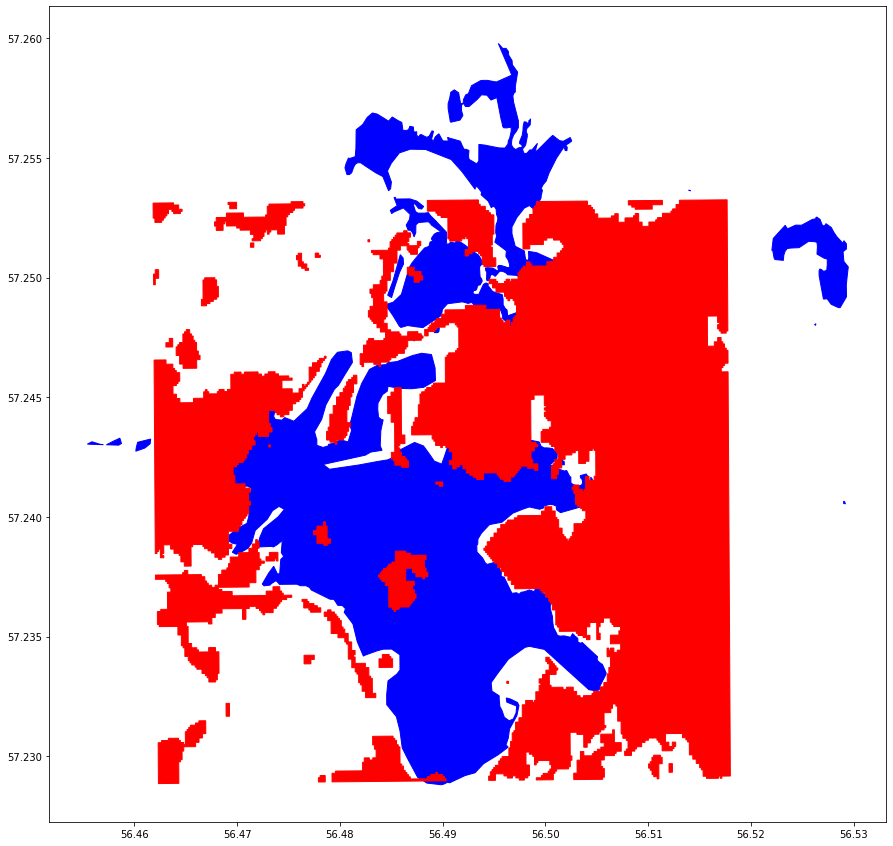

In [46]:
def plot_many(l, **kwargs):
    for p in l:
        x,y = p.exterior.xy
        plt.fill(x,y, **kwargs)

plot_many(df_target.geometry, color='blue')
plot_many(df_all.geometry, color='red')

In [ ]:
def read_poly(df, idx=2049):
    row = 
    poly = row
    return json.loads(df.loc[idx].geometry.to_json())

In [72]:
def sample(df, df_trg):
    ret = []
    for idx,row in df.iterrows():
        area = 8934
        length = 45383
        print(row.geometry)
        ret.append({
            'id': idx,
            'area': area,
            'length': length,
            'map_fields': json.loads(row.geometry.to_json()),
            'map_ground_truth': json.loads(df_trg.loc[np.array(row.intersects_with, dtype=int)].geometry.to_json()),
            'status': 'new',
            'verified': False,
        })
    return {'data': ret}

In [81]:
type(df_target.loc[3].geometry)

shapely.geometry.polygon.Polygon

In [ ]:
type()

In [83]:
Polygon(df_target.loc[3].geometry)

AttributeError: 'Polygon' object has no attribute 'to_json'

In [80]:
df_target.loc[3].geometry.to_json()

AttributeError: 'Polygon' object has no attribute 'to_json'

In [73]:
sample(df_all, df_target)

POLYGON ((56.46912586971857 57.25314303846068, 56.46995454321856 57.25314653591855, 56.46995841192075 57.25287705374902, 56.46929547794371 57.25287425624854, 56.46929289559107 57.25305391101038, 56.46912716130942 57.25305321108413, 56.46912586971857 57.25314303846068))


AttributeError: 'Polygon' object has no attribute 'to_json'

In [71]:
df_all.geometry.to_json

<bound method GeoSeries.to_json of 0     POLYGON ((56.46913 57.25314, 56.46995 57.25315...
1     POLYGON ((56.50807 57.25321, 56.51139 57.25322...
2     POLYGON ((56.46183 57.25311, 56.46382 57.25312...
3     POLYGON ((56.47526 57.25317, 56.47642 57.25317...
4     POLYGON ((56.48274 57.25158, 56.48290 57.25158...
5     POLYGON ((56.47130 57.25145, 56.47164 57.25145...
6     POLYGON ((56.47761 57.25102, 56.47794 57.25102...
7     POLYGON ((56.48852 57.25322, 56.49349 57.25324...
8     POLYGON ((56.47595 57.25102, 56.47628 57.25102...
9     POLYGON ((56.48657 57.25043, 56.48723 57.25043...
10    POLYGON ((56.46204 57.25033, 56.46237 57.25033...
11    POLYGON ((56.46685 57.24999, 56.46785 57.24999...
12    POLYGON ((56.46341 57.24746, 56.46374 57.24746...
13    POLYGON ((56.46506 57.24783, 56.46539 57.24783...
14    POLYGON ((56.48621 57.25196, 56.48655 57.25196...
15    POLYGON ((56.47850 57.24671, 56.47866 57.24672...
16    POLYGON ((56.47800 57.24662, 56.47850 57.24662...
17    POLYGON

In [19]:
df_all['intersected'] = df_all.geometry.apply(lambda x: [])

In [ ]:
%%time
# poly = df_all.loc[0].geometry
for j, rowj in df_all.iterrows():
    print(j)
    poly = rowj.geometry
    for i, row in df_target.iterrows():
        if poly.intersects(row.geometry):
            df_all.loc[j].intersected.append(i)
    print(df_all.loc[j].intersected)
#     if j == 50: break
    # until 123 clear

In [ ]:
def find_intersected(df, df_target, idx):
    geoms = df[df.ORIG_FID == idx].geometry
    df['id_intersect'] = geoms.apply(
       lambda x: [i for i in range(len(geoms))
                     if x != geoms[i] and x.intersects(geoms[i])])

In [26]:
sample(df_all, [1,2,3])

{'data': [{'id': 1,
   'area': 41.1405976866,
   'length': 415.369280927,
   'map_fields': {'type': 'FeatureCollection',
    'features': [{'id': '0',
      'type': 'Feature',
      'properties': {},
      'geometry': {'type': 'Polygon',
       'coordinates': [[[57.006923041786855, 56.134307607677954, 0.0],
         [57.006918009940485, 56.13430437704444, 0.0],
         [57.0069165755412, 56.13430887129559, 0.0],
         [57.009096685559335, 56.13571813851363, 0.0],
         [57.006923041786855, 56.134307607677954, 0.0]]]},
      'bbox': [57.0069165755412,
       56.13430437704444,
       57.009096685559335,
       56.13571813851363]}],
    'bbox': [57.0069165755412,
     56.13430437704444,
     57.009096685559335,
     56.13571813851363]},
   'map_ground_truth': {'type': 'FeatureCollection',
    'features': [{'id': '0',
      'type': 'Feature',
      'properties': {},
      'geometry': {'type': 'Polygon',
       'coordinates': [[[57.006923041786855, 56.134307607677954, 0.0],
         

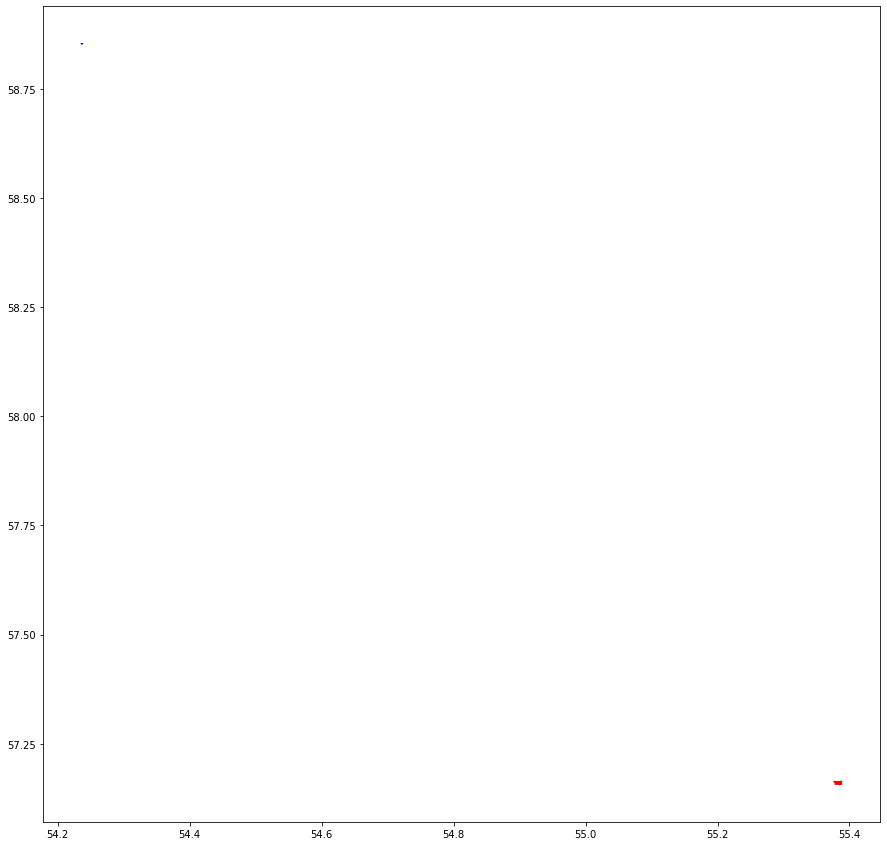

In [12]:
idx = 2966
fields = df_all[df_all.ORIG_FID == idx].geometry
targets = df_target[df_target.ORIG_FID == idx].geometry
plot_many(fields, color='blue')
plot_many(targets, color='red')

In [70]:
df_all.ORIG_FID.value_counts()
pfx

1141    1629
2901    1424
1642    1037
1414     626
1106     536
        ... 
1465       1
1449       1
3480       1
1417       1
2049       1
Name: ORIG_FID, Length: 4863, dtype: int64

In [58]:
path = 'data/fields/fields.shp'
df = gpd.read_file(path)
df

,ID,GRIDCODE,area,Shape_Leng,Shape_Area,geometry


In [59]:
path = 'data/changes/changes.shp'
df = gpd.read_file(path)
df

,Id,ORIG_FID,Shape_Leng,Shape_Area,area2,geometry
0,0,604,2.247479e+03,7.939757e+04,21579.822452,"POLYGON Z ((55.38166 56.74943 0.00000, 55.3813..."
1,0,604,2.247479e+03,7.939757e+04,45818.976439,"POLYGON Z ((55.38327 56.75212 0.00000, 55.3833..."
2,0,613,2.759744e+04,2.245003e+06,397898.520648,"MULTIPOLYGON Z (((55.47130 56.74659 0.00000, 5..."
3,0,613,2.759744e+04,2.245003e+06,10337.119067,"POLYGON Z ((55.47460 56.75219 0.00000, 55.4746..."
4,0,650,2.996381e+04,3.881749e+06,60049.952412,"POLYGON Z ((55.48926 56.75100 0.00000, 55.4899..."
...,...,...,...,...,...,...
8256,0,18543,3.943298e+06,7.506543e+08,14121.788463,"POLYGON Z ((55.62997 57.38597 0.00000, 55.6302..."
8257,0,18543,3.943298e+06,7.506543e+08,28136.044511,"POLYGON Z ((55.62044 57.39169 0.00000, 55.6204..."
8258,0,18543,3.943298e+06,7.506543e+08,259081.164609,"POLYGON Z ((55.66200 57.39238 0.00000, 55.6620..."
8259,0,18543,3.943298e+06,7.506543e+08,389309.389397,"POLYGON Z ((55.62997 57.39408 0.00000, 55.6301..."


In [41]:
geoms = df.geometry.copy()

In [ ]:
df['id_intersect'] = geoms.apply(
       lambda x: [i for i in range(len(geoms))
                     if x != geoms[i] and x.intersects(geoms[i])])

In [31]:
row = df[df.ORIG_FID == 2049].copy()

In [32]:
poly = row.geometry

In [33]:
poly.to_json()

'{"type": "FeatureCollection", "features": [{"id": "11459", "type": "Feature", "properties": {}, "geometry": {"type": "Polygon", "coordinates": [[[368738.01159999985, 6453331.687899999, 0.0], [368891.1085000001, 6453276.573000001, 0.0], [368891.0641000001, 6453276.574200001, 0.0], [368735.94209999964, 6453331.687899999, 0.0], [368738.01159999985, 6453331.687899999, 0.0]]]}, "bbox": [368735.94209999964, 6453276.573000001, 368891.1085000001, 6453331.687899999]}], "bbox": [368735.94209999964, 6453276.573000001, 368891.1085000001, 6453331.687899999]}'

In [36]:
[poly.to_json()]

['{"type": "FeatureCollection", "features": [{"id": "11459", "type": "Feature", "properties": {}, "geometry": {"type": "Polygon", "coordinates": [[[368738.01159999985, 6453331.687899999, 0.0], [368891.1085000001, 6453276.573000001, 0.0], [368891.0641000001, 6453276.574200001, 0.0], [368735.94209999964, 6453331.687899999, 0.0], [368738.01159999985, 6453331.687899999, 0.0]]]}, "bbox": [368735.94209999964, 6453276.573000001, 368891.1085000001, 6453331.687899999]}], "bbox": [368735.94209999964, 6453276.573000001, 368891.1085000001, 6453331.687899999]}']

In [17]:
df.ORIG_FID.value_counts()

1141    1629
2901    1424
1642    1037
1414     626
1106     536
        ... 
1465       1
1449       1
3480       1
1417       1
2049       1
Name: ORIG_FID, Length: 4863, dtype: int64


In [16]:
geojsonio.display(states)

'http://geojson.io/#data=data:application/json,%7B%22type%22%3A%20%22FeatureCollection%22%2C%20%22features%22%3A%20%5B%7B%22type%22%3A%20%22Feature%22%2C%20%22geometry%22%3A%20%7B%22type%22%3A%20%22FeatureCollection%22%2C%20%22features%22%3A%20%5B%7B%22id%22%3A%20%220%22%2C%20%22type%22%3A%20%22Feature%22%2C%20%22properties%22%3A%20%7B%22ObjectCode%22%3A%20%22738%22%2C%20%22ObjectID%22%3A%20%221%22%2C%20%22ObjectKey%22%3A%20%22S0000000738%22%2C%20%22ObjectName%22%3A%20%22102-%5Cufffd%5Cufffd%5Cufffd%5Cufffd%5Cufffd%20%5Cufffd%5Cufffd%5Cufffd%5Cufffd%5Cufffd%5Cufffd%5Cufffd%20%5Cufffd%5Cufffd%5Cufffd%22%2C%20%22SEM_1%22%3A%20%22%22%7D%2C%20%22geometry%22%3A%20%7B%22type%22%3A%20%22Polygon%22%2C%20%22coordinates%22%3A%20%5B%5B%5B1314095.597953%2C%20479249.9877%5D%2C%20%5B1314093.127372%2C%20479246.572852%5D%2C%20%5B1314092.924004%2C%20479246.710366%5D%2C%20%5B1314091.519804%2C%20479244.897484%5D%2C%20%5B1314091.645699%2C%20479244.815169%5D%2C%20%5B1314089.263402%2C%20479241.721066%5D%2C%